In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
# Excel dosyasını yükle
file_path = 'elektrik_veri_hashed.xlsx'
xls = pd.ExcelFile(file_path)
# Sayfa isimlerini görüntüle
print("Sayfa isimleri:", xls.sheet_names)
# Her sayfayı ayrı DataFrame'e yükle
df_tahsilat = pd.read_excel(xls, sheet_name='Tahsilat')
df_tahsilat_1 = pd.read_excel(xls, sheet_name='Tahsilat 1')
df_tahakkuk = pd.read_excel(xls, sheet_name='Tahakkuk') # Hamamözü
df_tahakkuk_1 = pd.read_excel(xls, sheet_name='Tahakkuk 1') # Gümüşhacıköy
df_tahakkuk_2 = pd.read_excel(xls, sheet_name='Tahakkuk 2')

Sayfa isimleri: ['Tahsilat', 'Tahsilat 1', 'Tahakkuk', 'Tahakkuk 1', 'Tahakkuk 2']


In [41]:
df_tahsilat_1

,Mali yıl/dönem,İl,İlçe,Söz.hsp.(bağımsız),Hesap Sınıfı,Tahakkuk Tutar,Son Ödeme Tarihinden Önceki Tahsilat,Son Ödeme Tarihindeki Tahsilat,Son Ödeme (1),Son Ödeme (2),...,Son Ödeme (5),Son Ödeme (6-10),Son Ödeme (10-20),Son Ödeme (20-30),Son Ödeme (30-60),Son Ödeme (60-90),Son Ödeme (90-120),Son Ödeme (120-150),Son Ödeme (150-180),Son Ödeme (180+)
0,OCK 2023,AMASYA,GÖYNÜCEK,9374624783,Mesken,5.03,0.03,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
1,OCK 2023,AMASYA,GÖYNÜCEK,236184905,Mesken,26.46,0.06,26.40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OCK 2023,AMASYA,GÖYNÜCEK,9657731015,Mesken,121.53,NaN,NaN,NaN,121.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OCK 2023,AMASYA,GÖYNÜCEK,9554442880,Mesken,117.49,NaN,117.49,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OCK 2023,AMASYA,GÖYNÜCEK,6031642522,Mesken,170.30,170.30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917627,MAY 2025,AMASYA,TAŞOVA,9331776633,Mesken,188.76,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,188.76,NaN,NaN,NaN,NaN,NaN,NaN
917628,MAY 2025,AMASYA,TAŞOVA,5318202184,Mesken,0.06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
917629,MAY 2025,AMASYA,TAŞOVA,8095215513,Mesken,11.05,NaN,11.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
917630,MAY 2025,AMASYA,TAŞOVA,8434473747,Mesken,9.47,9.47,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
hesap_sınıfı_hamamozu = df_tahakkuk["hesap_sinifi"]
hesap_sınıfı_gumus =  df_tahakkuk_1["hesap_sinifi"]
hesap_sınıfı_goynucek = df_tahakkuk_2["hesap_sinifi"]

In [9]:
count_hamamozu = hesap_sınıfı_hamamozu.value_counts()
count_gumus = hesap_sınıfı_gumus.value_counts()
count_goynucek = hesap_sınıfı_goynucek.value_counts()

Text(0.5, 1.0, 'Göynücek - Hesap Sınıfı Dağılımı')

<Figure size 640x480 with 0 Axes>

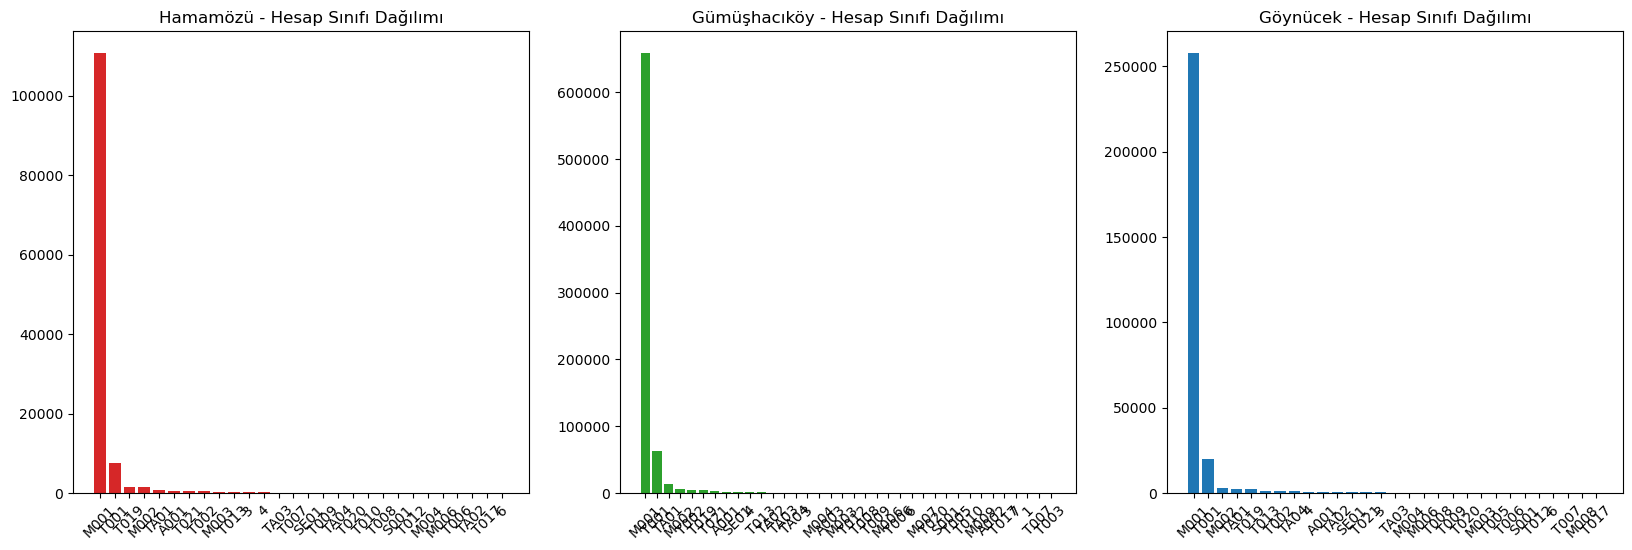

In [11]:
plt.figure()
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].bar(count_hamamozu.index.astype(str), count_hamamozu, color='tab:red')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Hamamözü - Hesap Sınıfı Dağılımı')

ax[1].bar(count_gumus.index.astype(str), count_gumus, color='tab:green')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Gümüşhacıköy - Hesap Sınıfı Dağılımı')

ax[2].bar(count_goynucek.index.astype(str), count_goynucek, color='tab:blue')
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title('Göynücek - Hesap Sınıfı Dağılımı')

In [13]:
# 1. Her dataframe'e hangi ilçeye ait olduğunu belirten bir sütun ekleyelim
df_tahakkuk['ilce_adi'] = 'Hamamözü'
df_tahakkuk_1['ilce_adi'] = 'Gümüşhacıköy'
df_tahakkuk_2['ilce_adi'] = 'Göynücek'

# 2. Şimdi verileri birleştirelim
df_trend = pd.concat([df_tahakkuk, df_tahakkuk_1, df_tahakkuk_2], ignore_index=True)

# 3. Tarih formatını ayarlayalım ve 'Ay' bilgisini çekelim
# Not: Sütun adı 'tahakkuk_tarihi' veya benzeri olabilir, kontrol et.
df_trend['mali_yil_donem'] = pd.to_datetime(df_trend['mali_yil_donem'])
df_trend['Ay'] = df_trend['mali_yil_donem'].dt.month

# Kontrol edelim
df_trend.head()

,il,ilce,sozlesme_hesap_no,mali_yil_donem,fatura_tarihi,kayit_tarihi,vade_tarihi,hesap_sinifi,Hesap Sınıfı,kwh,ilce_adi,Ay
0,AMASYA,HAMAMÖZÜ,917576806,2023-01-01,2023-01-12,2023-03-06,2023-01-23,M001,Mesken,1.79,Hamamözü,1
1,AMASYA,HAMAMÖZÜ,917576806,2023-01-01,2023-02-09,2023-05-11,2023-02-20,M001,Mesken,2.60,Hamamözü,1
2,AMASYA,HAMAMÖZÜ,917576806,2023-02-01,2023-02-09,2023-05-11,2023-02-20,M001,Mesken,1.23,Hamamözü,2
3,AMASYA,HAMAMÖZÜ,917576806,2023-02-01,2023-03-10,2023-05-11,2023-03-20,M001,Mesken,2.56,Hamamözü,2
4,AMASYA,HAMAMÖZÜ,917576806,2023-03-01,2023-03-10,2023-05-11,2023-03-20,M001,Mesken,1.35,Hamamözü,3


In [15]:
# Satırlarda Aylar, Sütunlarda İlçeler, Değerlerde Ortalama Tüketim olsun
mevsimsel_veri = df_trend.groupby(['Ay', 'ilce_adi'])['kwh'].mean().unstack()

print(mevsimsel_veri)

ilce_adi    Göynücek  Gümüşhacıköy   Hamamözü
Ay                                           
1          71.727193     90.125893  73.534403
2          66.219465     83.659150  65.242653
3          75.583227     90.309883  69.378002
4          79.906542     93.759577  66.193618
5          77.440839     84.812281  66.700636
6         118.683910    108.061115  71.609768
7         140.941444    140.082910  78.383162
8         126.582059    113.671397  77.410581
9          92.202175     90.539618  70.389814
10         75.533738     85.033899  70.423734
11         71.110257     87.015673  71.053503
12         72.143571     92.950854  72.040671


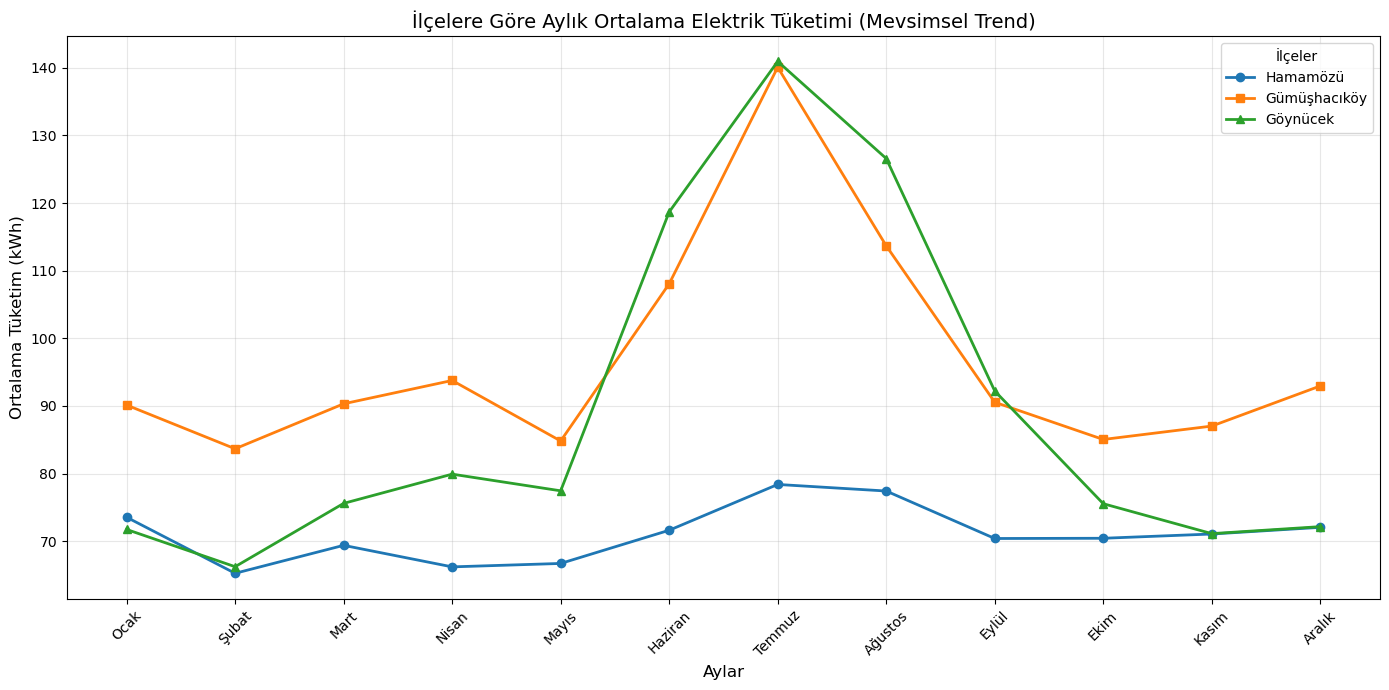

In [17]:
import matplotlib.pyplot as plt

# Grafik boyutu
plt.figure(figsize=(14, 7))

# Çizgi grafikleri (Her ilçe otomatik olarak ayrı renk olur)
# marker='o' ile noktaları belirginleştiriyoruz
plt.plot(mevsimsel_veri.index, mevsimsel_veri['Hamamözü'], marker='o', linewidth=2, label='Hamamözü')
plt.plot(mevsimsel_veri.index, mevsimsel_veri['Gümüşhacıköy'], marker='s', linewidth=2, label='Gümüşhacıköy')
plt.plot(mevsimsel_veri.index, mevsimsel_veri['Göynücek'], marker='^', linewidth=2, label='Göynücek')

# Eksen ve Başlık Ayarları
plt.title('İlçelere Göre Aylık Ortalama Elektrik Tüketimi (Mevsimsel Trend)', fontsize=14)
plt.xlabel('Aylar', fontsize=12)
plt.ylabel('Ortalama Tüketim (kWh)', fontsize=12)

# X Ekseninde Sayı Yerine Ay İsimleri Gösterme (İsteğe Bağlı)
ay_isimleri = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
plt.xticks(ticks=range(1, 13), labels=ay_isimleri, rotation=45)

# Izgara ve Lejant
plt.grid(True, alpha=0.3)
plt.legend(title="İlçeler")

plt.tight_layout()
plt.show()

In [45]:
# Zamanında ödeme sütunları (Verideki isimlerle birebir aynı olmalı)
cols_zamaninda = [
    'Son Ödeme Tarihinden Önceki Tahsilat', 
    'Son Ödeme Tarihindeki Tahsilat'
]

# Geç ödeme sütunları: İsmi 'Son Ödeme (' ile başlayan tüm sütunları otomatik bulalım
cols_gec = [col for col in df_tahsilat_1.columns if 'Son Ödeme (' in col]

# Önce NaN (boş) değerleri 0 yapalım ki toplama işlemi bozulmasın
df_filled = df_tahsilat_1.fillna(0)

# Tüm satırlardaki "Zamanında" ve "Geç" tutarların genel toplamını alalım
toplam_zamaninda = df_filled[cols_zamaninda].sum().sum()
toplam_gec = df_filled[cols_gec].sum().sum()

# Sonuçları görelim
print(f"Toplam Zamanında Tahsilat: {toplam_zamaninda:,.2f}")
print(f"Toplam Geç Tahsilat: {toplam_gec:,.2f}")

Toplam Zamanında Tahsilat: 308,328,467.86
Toplam Geç Tahsilat: 157,984,135.14


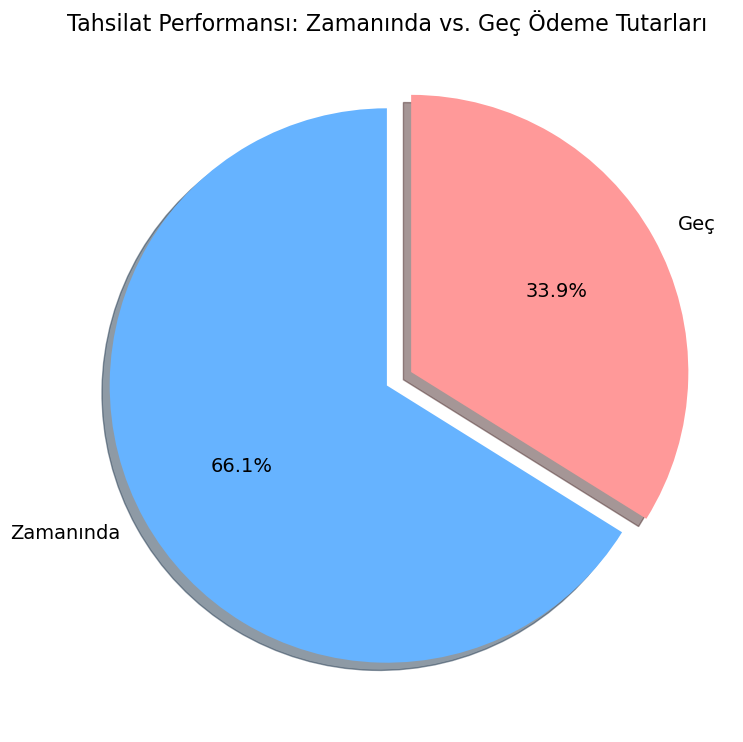

In [47]:
#Pasta Grafiği
labels = ['Zamanında', 'Geç']
sizes = [toplam_zamaninda, toplam_gec]
colors = ['#66b3ff', '#ff9999'] # Mavi ve Kırmızı

plt.figure(figsize=(9, 9))

# Pasta grafiği
plt.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%', # Yüzdelik gösterim
        startangle=90, 
        colors=colors, 
        explode=(0, 0.1), # Geç dilimini biraz dışarı çıkaralım
        shadow=True,
        textprops={'fontsize': 14})

plt.title('Tahsilat Performansı: Zamanında vs. Geç Ödeme Tutarları', fontsize=16)
plt.show()

In [58]:
# Önce tüm tüketim verilerini birleştirelim
df_tum_tahakkuk = pd.concat([df_tahakkuk, df_tahakkuk_1, df_tahakkuk_2], ignore_index=True)

# 'kwh' sütununu sayısal formata çevirelim (Hatalı metinler varsa NaN olur)
df_tum_tahakkuk['kwh'] = pd.to_numeric(df_tum_tahakkuk['kwh'], errors='coerce')

# Boş (NaN) ve Negatif (Hatalı) değerleri analizden çıkaralım
data_clean = df_tum_tahakkuk[df_tum_tahakkuk['kwh'] > 0]['kwh'].dropna()

#Q1 VE Q3 Ü BELİRLEYELİM 
Q1 = data_clean.quantile(0.25)
Q3 = data_clean.quantile(0.75)
IQR = Q3 - Q1
ust_sinir = Q3 + 1.5 * IQR

# Aykırı değerleri (Outliers) filtreleyelim
outliers = data_clean[data_clean > ust_sinir]
print(f"Normal Tüketim Üst Sınırı: {ust_sinir:.2f} kWh")
print(f"Toplam Aykırı Değer (Outlier) Sayısı: {len(outliers)}")
print(f"Veri Setindeki Oranı: %{len(outliers) / len(data_clean) * 100:.2f}")

Normal Tüketim Üst Sınırı: 171.94 kWh
Toplam Aykırı Değer (Outlier) Sayısı: 49106
Veri Setindeki Oranı: %4.35


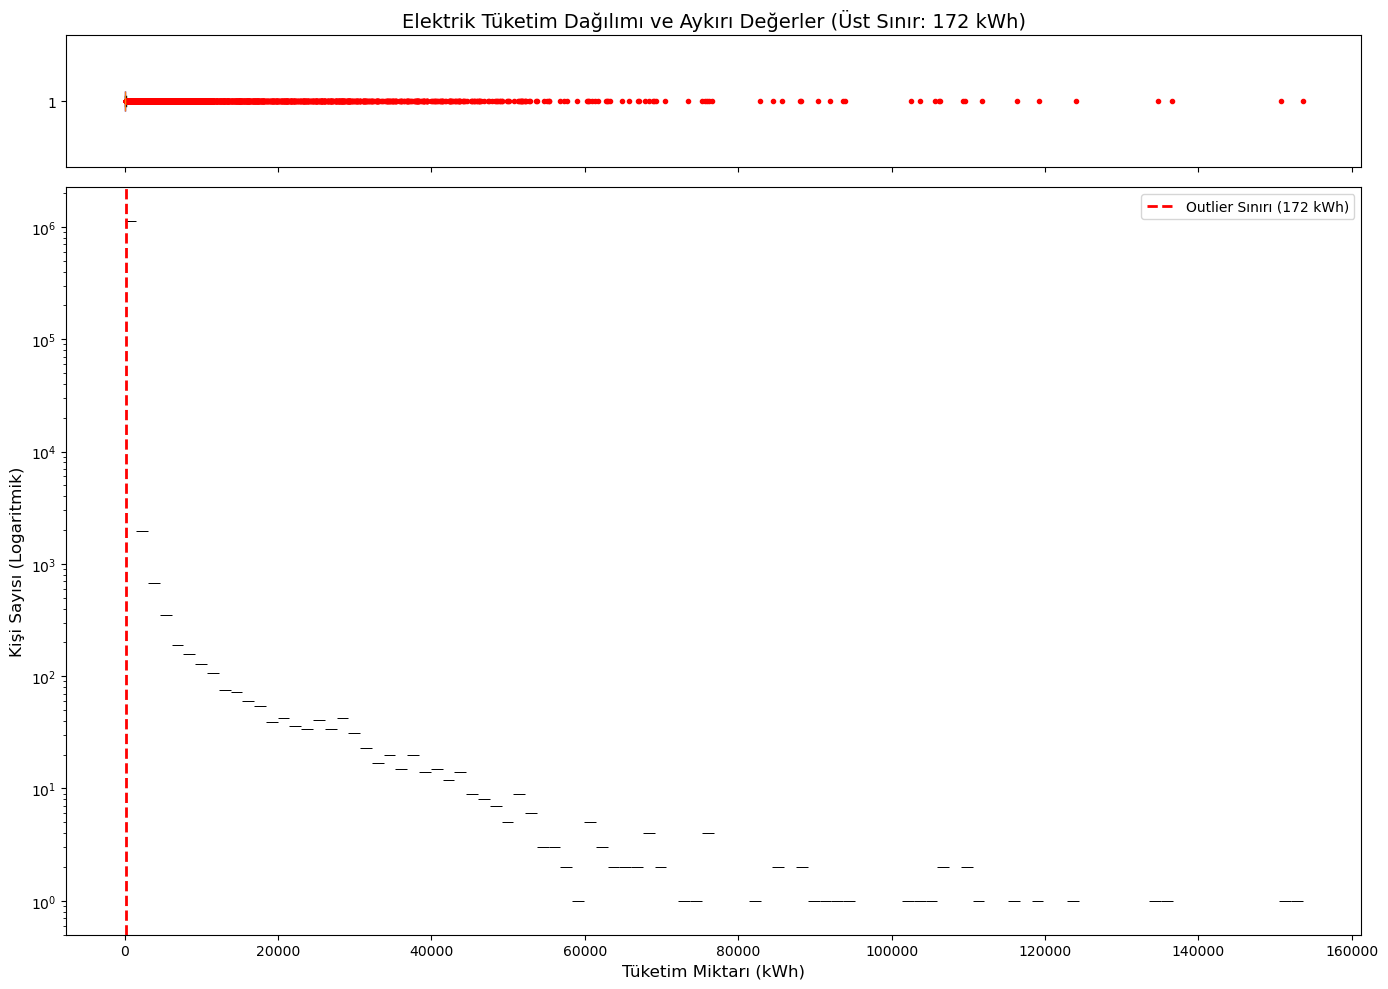

In [60]:
# Alt alta iki grafik alanı oluşturuyoruz 
fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=(14, 10), 
                                      sharex=True, # X ekseni ortak olsun
                                      gridspec_kw={"height_ratios": (.15, .85)})

# (Kutu Grafiği)
# 'flierprops' parametresi ile outlier noktalarını kırmızı yapıyoruz
ax_box.boxplot(data_clean, vert=False, patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='blue'),
               flierprops=dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none', markeredgecolor='red'))
ax_box.set_title(f'Elektrik Tüketim Dağılımı ve Aykırı Değerler (Üst Sınır: {ust_sinir:.0f} kWh)', fontsize=14)
ax_box.set_xlabel('') # Üst grafiğin x etiketi olmasın (alttakiyle aynı)

# Histogram
sns.histplot(data_clean, bins=100, kde=False, color='skyblue', edgecolor='black', ax=ax_hist, log_scale=(False, True))

# İstatistiksel üst sınırı çizgi olarak ekleyelim
ax_hist.axvline(ust_sinir, color='red', linestyle='--', linewidth=2, label=f'Outlier Sınırı ({ust_sinir:.0f} kWh)')

# Eksen İsimleri
ax_hist.set_ylabel('Kişi Sayısı (Logaritmik)', fontsize=12)
ax_hist.set_xlabel('Tüketim Miktarı (kWh)', fontsize=12)
ax_hist.legend()

plt.tight_layout()
plt.show()